<a href="https://colab.research.google.com/github/nelsonbeas33/procesamiento-datos/blob/main/tarea4/procesamiento_de_datos_tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introducción**  

La detección de formas geométricas, como círculos, es una tarea fundamental en el procesamiento de imágenes con aplicaciones en robótica, medicina, control de calidad y más. En este ejercicio, utilizaremos técnicas de visión por computadora para identificar monedas en una imagen precargada de la librería `scikit-image`. Aplicaremos filtros de suavizado, detección de bordes y la transformada de Hough para círculos, evaluando cómo los parámetros afectan la precisión del algoritmo. El objetivo es entender el flujo de procesamiento y optimizar la detección automática de objetos circulares en imágenes reales.

In [1]:
# 1. Importar librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

In [2]:
# 2. Cargar imagen de monedas (precargada desde scikit-image)
coins = data.coins()


In [3]:
# 3. Preparar imagen para procesamiento
# Convertir a formato BGR (OpenCV) y crear copia a color
img_color = cv2.cvtColor(coins, cv2.COLOR_GRAY2BGR)
original_gray = coins.copy()

In [4]:
# 4. Preprocesamiento
# Aplicar desenfoque Gaussiano
blurred = cv2.GaussianBlur(original_gray, (11, 11), 3)

In [5]:
# 5. Detección de bordes (Opcional para análisis visual)
edges = cv2.Canny(blurred, 50, 160)

In [6]:
# 6. Detección de círculos
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.1,
    minDist=45,
    param1=70,
    param2=32,
    minRadius=25,
    maxRadius=65
)

In [7]:
# 7. Dibujar resultados
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(img_color, (i[0], i[1]), i[2], (0, 255, 0), 2)  # Borde
        cv2.circle(img_color, (i[0], i[1]), 3, (255, 0, 0), 3)      # Centro

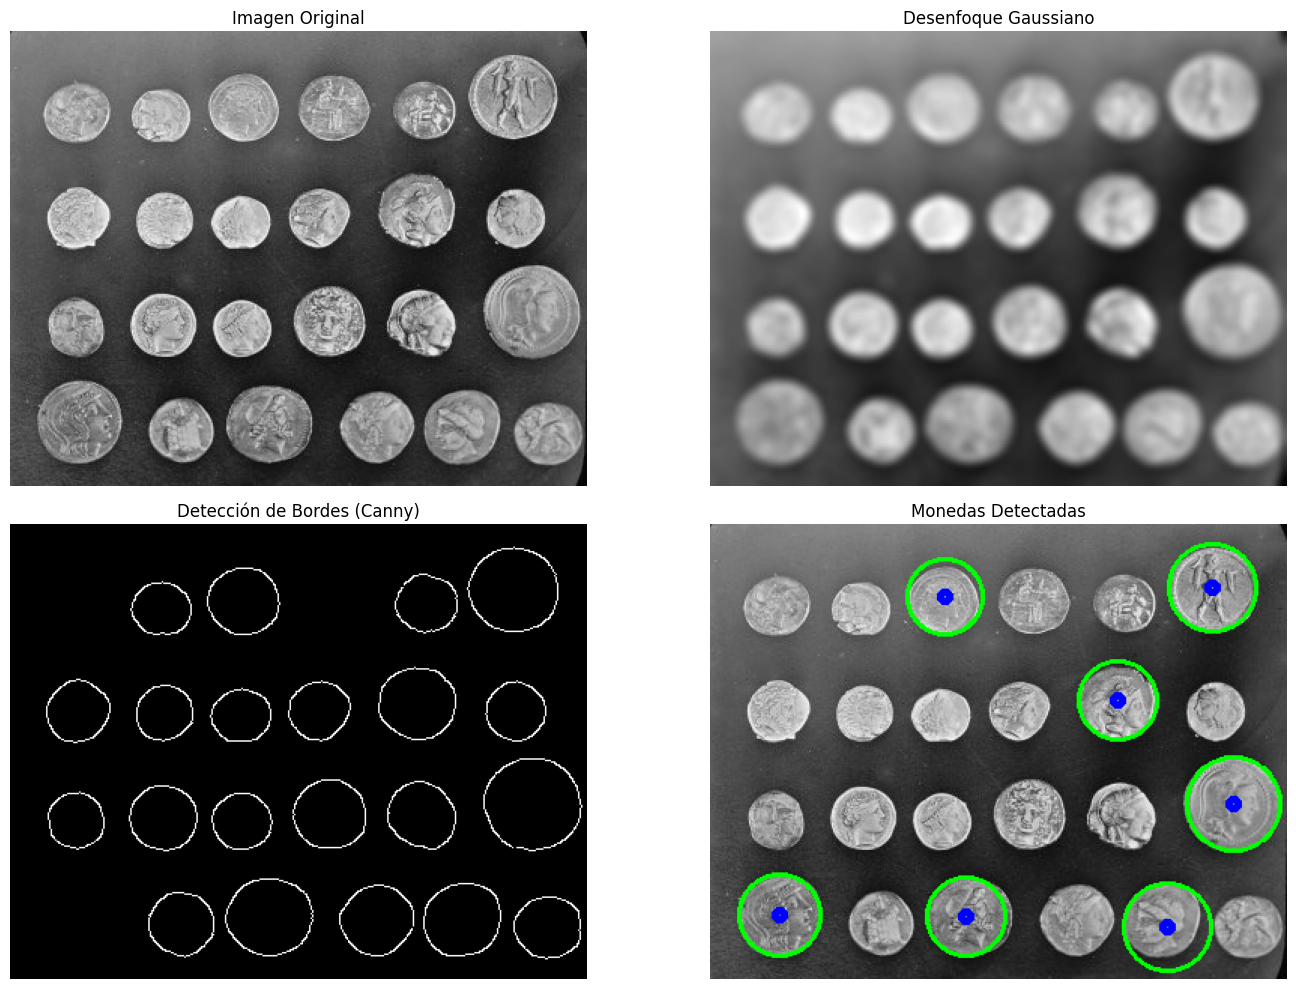

In [8]:
# 8. Visualización comparativa
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0,0].imshow(original_gray, cmap='gray')
ax[0,0].set_title('Imagen Original')
ax[0,0].axis('off')

ax[0,1].imshow(blurred, cmap='gray')
ax[0,1].set_title('Desenfoque Gaussiano')
ax[0,1].axis('off')

ax[1,0].imshow(edges, cmap='gray')
ax[1,0].set_title('Detección de Bordes (Canny)')
ax[1,0].axis('off')

ax[1,1].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
ax[1,1].set_title('Monedas Detectadas')
ax[1,1].axis('off')

plt.tight_layout()
plt.show()